In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import os
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout,LSTM

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime
from datetime import date, timedelta
e_date = datetime.datetime.strptime('2020-06-20', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-04-01', '%Y-%m-%d')

data_path = 'D:/universidad/universidad 4/TFG/recursos para el desarrollo/datos procesados/OD'

In [2]:
delta = e_date - i_date

target_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    target_days.append(day)

In [3]:
def read_OD_fn(source_type):
    ods = {}
    for date in tqdm_notebook(target_days):
        od_date= pd.read_csv(os.path.join(data_path, 'date_{}_OD_{}.csv'.format(source_type,date.strftime('%Y-%m-%d'))), 
                            index_col=0)
        ods[date] = od_date
    return ods

In [4]:
ine_ods = read_OD_fn('INE')

  0%|          | 0/81 [00:00<?, ?it/s]

In [5]:
twt_ods = read_OD_fn('TWT')

  0%|          | 0/81 [00:00<?, ?it/s]

# Serializar los datos

In [6]:
lista_twt1 = []
lista_twt2 = []
lista_twt3 = []
lista_twt4 = []
lista_twt5 = []

for date in tqdm_notebook(target_days):
    lista_twt1.append(twt_ods[date].loc['58MA','total'])
    lista_twt2.append(twt_ods[date].loc['156B','total'])
    lista_twt3.append(twt_ods[date].loc['34CZ','total'])
    lista_twt4.append(twt_ods[date].loc['165V','total'])
    lista_twt5.append(twt_ods[date].loc['13VI','total'])
    
    
lista_ine1 = []
lista_ine2 = []
lista_ine3 = []
lista_ine4 = []
lista_ine5 = []

for date in tqdm_notebook(target_days):
    lista_ine1.append(ine_ods[date].loc['58MA','total'])
    lista_ine2.append(ine_ods[date].loc['156B','total'])
    lista_ine3.append(ine_ods[date].loc['34CZ','total'])
    lista_ine4.append(ine_ods[date].loc['165V','total'])
    lista_ine5.append(ine_ods[date].loc['13VI','total'])


  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

In [7]:
df_twt1 = pd.DataFrame (lista_twt1, columns = ['Viajes'], index= target_days)
df_ine1 = pd.DataFrame (lista_ine1, columns = ['Viajes'], index= target_days)

df_twt2 = pd.DataFrame (lista_twt2, columns = ['Viajes'], index= target_days)
df_ine2 = pd.DataFrame (lista_ine2, columns = ['Viajes'], index= target_days)

df_twt3 = pd.DataFrame (lista_twt3, columns = ['Viajes'], index= target_days)
df_ine3 = pd.DataFrame (lista_ine3, columns = ['Viajes'], index= target_days)

df_twt4 = pd.DataFrame (lista_twt4, columns = ['Viajes'], index= target_days)
df_ine4 = pd.DataFrame (lista_ine4, columns = ['Viajes'], index= target_days)

df_twt5 = pd.DataFrame (lista_twt5, columns = ['Viajes'], index= target_days)
df_ine5 = pd.DataFrame (lista_ine5, columns = ['Viajes'], index= target_days)

In [8]:
lista_twt = []
lista_ine = []

df_twt = df_twt1 + df_twt2 + df_twt3 + df_twt4 + df_twt5
df_ine = df_ine1 + df_ine2 + df_ine3 + df_ine4 + df_ine5

In [9]:
df_twt.head()

,Viajes
2020-04-01,11
2020-04-02,3
2020-04-03,14
2020-04-04,5
2020-04-05,13


In [10]:
df_ine.head()

,Viajes
2020-04-01,16278
2020-04-02,16895
2020-04-03,18153
2020-04-04,13180
2020-04-05,11805


In [11]:
del twt_ods
del ine_ods

# Visualización de datos

In [12]:
print(df_twt.index.min())
print(df_ine.index.max())

2020-04-01 00:00:00
2020-06-20 00:00:00


In [13]:
print(len(df_twt['2020']))

81


In [14]:
print(len(df_ine['2020']))

81


In [15]:
df_twt.describe()

,Viajes
count,81.000000
mean,17.518519
std,8.148790
min,0.000000
25%,11.000000
50%,16.000000
75%,24.000000
max,34.000000


In [16]:
df_ine.describe()

,Viajes
count,81.000000
mean,30777.061728
std,13658.229593
min,10416.000000
25%,18843.000000
50%,30457.000000
75%,42480.000000
max,55828.000000


In [17]:
meses = df_twt.resample('M').mean()
meses

,Viajes
2020-04-30,11.033333
2020-05-31,20.258065
2020-06-30,23.000000


In [18]:
meses = df_ine.resample('M').mean()
meses

,Viajes
2020-04-30,18261.733333
2020-05-31,32278.387097
2020-06-30,47223.000000


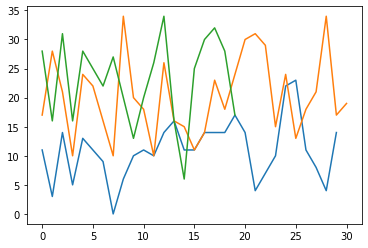

In [19]:
abril = df_twt['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_twt['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_twt['2020-06-01':'2020-06-20']
plt.plot(junio.values)

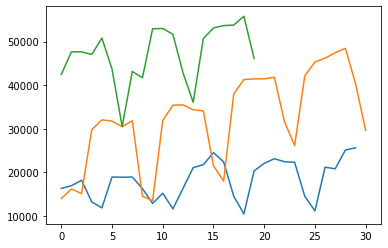

In [20]:
abril = df_ine['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_ine['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_ine['2020-06-01':'2020-06-20']
plt.plot(junio.values)

# Preprocesado de datos

In [21]:
dataset_twt = df_twt.values
dataset_twt = dataset_twt.astype('float32')

dataset_ine = df_ine.values
dataset_ine = dataset_ine.astype('float32')

In [22]:
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_twt = scaler.fit_transform(dataset_twt)
dataset_ine = scaler.fit_transform(dataset_ine)

# Dividimos los datos en sets de entrenamiento y validacion

In [23]:
#dividimos nuestros valores entre sets de entrenamiento y de test
n_train_days = 60
train_twt = dataset_twt[:n_train_days, :]
test_twt = dataset_twt[n_train_days:, :]

train_ine = dataset_ine[:n_train_days, :]
test_ine = dataset_ine[n_train_days:, :]

print(len(train_twt), len(test_twt))

60 21


In [24]:
# funcion para convertir un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset1, dataset2, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset2)-look_back):
    a = []
    for x in range(look_back):
        a.append(dataset2[i+x])  
        a.append(dataset1[i+x])
    a = np.array(a)
    a = np.reshape(a, (7, 1, 2))
    dataX.append(a)
    dataY.append(dataset2[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [25]:
# dividimos en entradas y salidas
look_back = 7
trainX, trainY = create_dataset(train_twt, train_ine, look_back)
testX, testY = create_dataset(test_twt, test_ine, look_back)

print(len(trainX), len(testY))

53 14


In [26]:
print(trainX)

[[[[0.12908483 0.32352942]]

  [[0.14267153 0.0882353 ]]

  [[0.17037347 0.4117647 ]]

  [[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]]


 [[[0.14267153 0.0882353 ]]

  [[0.17037347 0.4117647 ]]

  [[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]]


 [[[0.17037347 0.4117647 ]]

  [[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]

  [[0.12793976 0.1764706 ]]]


 [[[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]

  [[0.12793976 0.1764706 ]]

  [[0.05317977 0.29411766]]]


 [[[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]

  [[0.12793976 0.1764706 ]]

  [[0.05317977 0.29411766]]

  [[0.

In [27]:
print(trainY)

[0.18671277 0.12793976 0.05317977 0.10444376 0.02567604 0.1293931
 0.23418918 0.24907511 0.31002817 0.26323438 0.08909538 0.
 0.21734342 0.25565928 0.27919933 0.2640932  0.2611204  0.08898529
 0.01559059 0.23639125 0.2282216  0.32315245 0.33438298 0.07749054
 0.12613407 0.10285828 0.42594466 0.47579935 0.46945742 0.44131508
 0.47130713 0.08935964 0.06632608 0.47229806 0.5499207  0.5517484
 0.52682114 0.5209416  0.24343786 0.16645381 0.6077689  0.67957807
 0.68307936 0.68316746 0.6916013  0.46597818 0.34607592 0.69827354
 0.76862943 0.78765523 0.8153131  0.83762    0.6593411 ]


In [28]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 2))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 2))

In [29]:
print(trainX)

[[[0.12908483 0.32352942]
  [0.14267153 0.0882353 ]
  [0.17037347 0.4117647 ]
  [0.06086496 0.14705883]
  [0.03058663 0.38235295]
  [0.18677881 0.32352942]
  [0.18556768 0.2647059 ]]

 [[0.14267153 0.0882353 ]
  [0.17037347 0.4117647 ]
  [0.06086496 0.14705883]
  [0.03058663 0.38235295]
  [0.18677881 0.32352942]
  [0.18556768 0.2647059 ]
  [0.18671277 0.        ]]

 [[0.17037347 0.4117647 ]
  [0.06086496 0.14705883]
  [0.03058663 0.38235295]
  [0.18677881 0.32352942]
  [0.18556768 0.2647059 ]
  [0.18671277 0.        ]
  [0.12793976 0.1764706 ]]

 [[0.06086496 0.14705883]
  [0.03058663 0.38235295]
  [0.18677881 0.32352942]
  [0.18556768 0.2647059 ]
  [0.18671277 0.        ]
  [0.12793976 0.1764706 ]
  [0.05317977 0.29411766]]

 [[0.03058663 0.38235295]
  [0.18677881 0.32352942]
  [0.18556768 0.2647059 ]
  [0.18671277 0.        ]
  [0.12793976 0.1764706 ]
  [0.05317977 0.29411766]
  [0.10444376 0.32352942]]

 [[0.18677881 0.32352942]
  [0.18556768 0.2647059 ]
  [0.18671277 0.        ]
  

In [30]:
print(trainY)

[0.18671277 0.12793976 0.05317977 0.10444376 0.02567604 0.1293931
 0.23418918 0.24907511 0.31002817 0.26323438 0.08909538 0.
 0.21734342 0.25565928 0.27919933 0.2640932  0.2611204  0.08898529
 0.01559059 0.23639125 0.2282216  0.32315245 0.33438298 0.07749054
 0.12613407 0.10285828 0.42594466 0.47579935 0.46945742 0.44131508
 0.47130713 0.08935964 0.06632608 0.47229806 0.5499207  0.5517484
 0.52682114 0.5209416  0.24343786 0.16645381 0.6077689  0.67957807
 0.68307936 0.68316746 0.6916013  0.46597818 0.34607592 0.69827354
 0.76862943 0.78765523 0.8153131  0.83762    0.6593411 ]


# Creamos la red neuronal

In [31]:
def crear_modeloFF():
    model = Sequential() 
    model.add(LSTM(20, input_shape=(look_back,2), return_sequences=True))
    model.add(LSTM(50, input_shape=(look_back,2), return_sequences=True))
    model.add(Dropout(0.30))
    model.add(LSTM(100, input_shape=(look_back,2)))
    model.add(Dropout(0.30))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    return model

In [32]:
model = crear_modeloFF()

history=model.fit(trainX, trainY, epochs=200, validation_data=(testX,testY), batch_size=1, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 20)             1840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             14200     
_________________________________________________________________
dropout (Dropout)            (None, 7, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 76,541
Trainable params: 76,541
Non-trainable params: 0
____________________________________________________

Epoch 123/200
53/53 - 0s - loss: 0.0073 - val_loss: 0.0397
Epoch 124/200
53/53 - 0s - loss: 0.0126 - val_loss: 0.0347
Epoch 125/200
53/53 - 0s - loss: 0.0093 - val_loss: 0.0302
Epoch 126/200
53/53 - 0s - loss: 0.0081 - val_loss: 0.0271
Epoch 127/200
53/53 - 0s - loss: 0.0063 - val_loss: 0.0306
Epoch 128/200
53/53 - 0s - loss: 0.0085 - val_loss: 0.0226
Epoch 129/200
53/53 - 0s - loss: 0.0111 - val_loss: 0.0394
Epoch 130/200
53/53 - 0s - loss: 0.0088 - val_loss: 0.0223
Epoch 131/200
53/53 - 0s - loss: 0.0067 - val_loss: 0.0248
Epoch 132/200
53/53 - 0s - loss: 0.0088 - val_loss: 0.0261
Epoch 133/200
53/53 - 0s - loss: 0.0092 - val_loss: 0.0369
Epoch 134/200
53/53 - 0s - loss: 0.0112 - val_loss: 0.0320
Epoch 135/200
53/53 - 0s - loss: 0.0080 - val_loss: 0.0435
Epoch 136/200
53/53 - 0s - loss: 0.0102 - val_loss: 0.0245
Epoch 137/200
53/53 - 0s - loss: 0.0087 - val_loss: 0.0424
Epoch 138/200
53/53 - 0s - loss: 0.0061 - val_loss: 0.0272
Epoch 139/200
53/53 - 0s - loss: 0.0087 - val_loss: 0.02

# Visualizamos resultados

In [33]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


def compute_metrics_fn(y_valid_resc, y_hat_resc):
    mae_ = mean_absolute_error(y_valid_resc, y_hat_resc)
    mse_ = mean_squared_error(y_valid_resc, y_hat_resc)
    rmse_ = mean_squared_error(y_valid_resc, y_hat_resc, squared = False)
    cvrmse_ = rmse_/np.mean(y_valid_resc)*100 # it is a percentage
    mape_ = mape(y_valid_resc, y_hat_resc)
    
    return mae_, mse_, rmse_, cvrmse_, mape_

In [34]:
# hacemos las predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY_scalerInverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_scalerInverse = scaler.inverse_transform([testY])

In [35]:
# calculamos las metricas de error
trainScore_MAE, trainScore_MSE, trainScore_RMSE, trainScore_CVRMSE, trainScore_MAPE  =  compute_metrics_fn(trainY_scalerInverse[0], trainPredict[:,0])
print('Resultado del entrenamiento: %.2f MAE' % (trainScore_MAE))
print('Resultado del entrenamiento: %.2f MSE' % (trainScore_MSE))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore_RMSE))
print('Resultado del entrenamiento: %.2f CVRMSE' % (trainScore_CVRMSE))
print('Resultado del entrenamiento: %.2f MAPE \n' % (trainScore_MAPE))

testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(testY_scalerInverse[0], testPredict[:,0])
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del entrenamiento: 2507.18 MAE
Resultado del entrenamiento: 10277350.80 MSE
Resultado del entrenamiento: 3205.83 RMSE
Resultado del entrenamiento: 12.09 CVRMSE
Resultado del entrenamiento: 12.68 MAPE 

Resultado del test: 5508.44 MAE
Resultado del test: 40224659.88 MSE
Resultado del test: 6342.29 RMSE
Resultado del test: 13.35 CVRMSE
Resultado del test: 13.03 MAPE


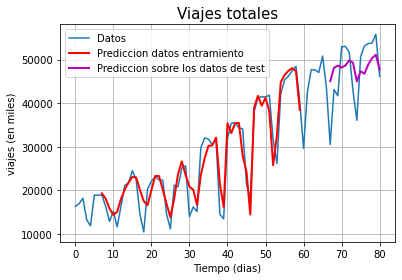

In [36]:
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(dataset_ine)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones del test de cambio para plotear
testPredictPlot = np.empty_like(dataset_ine)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset_ine), :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset_ine))
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Viajes totales", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

In [37]:
results=testPredict
print(len(results))

14


In [38]:
test = testY_scalerInverse[0]

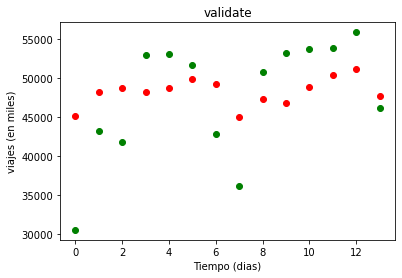

In [39]:
plt.scatter(range(len(test)),test,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

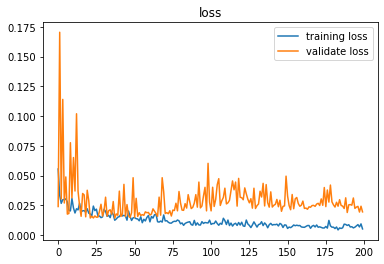

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend( ('training loss', 'validate loss'), loc = 'upper right')
plt.show()

In [41]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

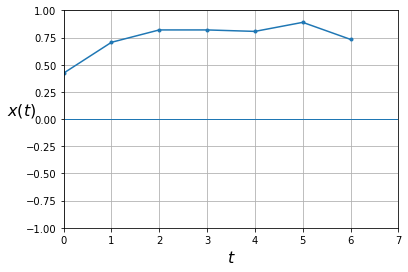

In [42]:
n_steps = 6
plot_series(testX[0, :, 0], testY_scalerInverse[0, 0], testPredict[0, 0])
plt.show()

# Exportar los datos

In [43]:
e_date = datetime.datetime.strptime('2020-06-20', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-06-07', '%Y-%m-%d')
delta = e_date - i_date

index_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    index_days.append(day)

prediccion = pd.DataFrame(testPredict, index= index_days)
prediccion.columns = ['valor predicho']

prediccion

,valor predicho
2020-06-07,45054.132812
2020-06-08,48133.667969
2020-06-09,48628.898438
2020-06-10,48171.089844
2020-06-11,48644.117188
2020-06-12,49847.054688
2020-06-13,49250.445312
2020-06-14,44986.519531
2020-06-15,47326.230469
2020-06-16,46763.386719


In [44]:
datosReales = df_ine['2020-6-07':'2020-6-20']

compara = pd.concat([datosReales, prediccion], axis=1)
compara.columns = ['real', 'prediccion']

compara

,real,prediccion
2020-06-07,30490,45054.132812
2020-06-08,43136,48133.667969
2020-06-09,41698,48628.898438
2020-06-10,52941,48171.089844
2020-06-11,53023,48644.117188
2020-06-12,51677,49847.054688
2020-06-13,42811,49250.445312
2020-06-14,36064,44986.519531
2020-06-15,50699,47326.230469
2020-06-16,53129,46763.386719


In [45]:
compara.to_excel('Resultados INE - TWT.xlsx', columns=['real', 'prediccion'])

# Prediccion a futuro

In [46]:
# usaremos 7 dias que poseemos para predecir los 7 dias siguientes tras esto compararemos los resultados con los que
# poseemos para ver el grado de error

Dias_twt = df_twt['2020-5-25':'2020-5-31']
Dias_ine = df_ine['2020-5-25':'2020-5-31']

In [47]:
# funcion para convertir un array de valores en una matriz de conjuntos de datos, en este caso modificada para ayudarnos a crear
#los distintos sets de entrenmiento para distintos modelos que predeciran 1 dia cada uno

def create_dataset2(dataset1, dataset2, look_back=1, dias=0):
  dataX, dataY = [], []
  for i in range(len(dataset2)-look_back-dias):
    a = []
    for x in range(look_back):
        a.append(dataset2[i+x])  
        a.append(dataset1[i+x])
    a = np.array(a)
    a = np.reshape(a, (7, 1, 2))
    dataX.append(a)
    dataY.append(dataset2[i + look_back + dias, 0])
  return np.array(dataX), np.array(dataY)

In [48]:
#ahora crearemos los sets para entrenar los modelos
look_back = 7

trainX1, trainY1 = create_dataset2(train_twt, train_ine, look_back, 1)
testX1, testY1 = create_dataset2(test_twt, test_ine, look_back, 1)

trainX2, trainY2 = create_dataset2(train_twt, train_ine, look_back, 2)
testX2, testY2 = create_dataset2(test_twt, test_ine, look_back, 2)

trainX3, trainY3 = create_dataset2(train_twt, train_ine, look_back, 3)
testX3, testY3 = create_dataset2(test_twt, test_ine, look_back, 3)

trainX4, trainY4 = create_dataset2(train_twt, train_ine, look_back, 4)
testX4, testY4 = create_dataset2(test_twt, test_ine, look_back, 4)

trainX5, trainY5 = create_dataset2(train_twt, train_ine, look_back, 5)
testX5, testY5 = create_dataset2(test_twt, test_ine, look_back, 5)

trainX6, trainY6 = create_dataset2(train_twt, train_ine, look_back, 6)
testX6, testY6 = create_dataset2(test_twt, test_ine, look_back, 6)

In [49]:
print(trainX1)

[[[[0.12908483 0.32352942]]

  [[0.14267153 0.0882353 ]]

  [[0.17037347 0.4117647 ]]

  [[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]]


 [[[0.14267153 0.0882353 ]]

  [[0.17037347 0.4117647 ]]

  [[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]]


 [[[0.17037347 0.4117647 ]]

  [[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]

  [[0.12793976 0.1764706 ]]]


 [[[0.06086496 0.14705883]]

  [[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]

  [[0.12793976 0.1764706 ]]

  [[0.05317977 0.29411766]]]


 [[[0.03058663 0.38235295]]

  [[0.18677881 0.32352942]]

  [[0.18556768 0.2647059 ]]

  [[0.18671277 0.        ]]

  [[0.12793976 0.1764706 ]]

  [[0.05317977 0.29411766]]

  [[0.

In [50]:
print(trainY1)

[0.12793976 0.05317977 0.10444376 0.02567604 0.1293931  0.23418918
 0.24907511 0.31002817 0.26323438 0.08909538 0.         0.21734342
 0.25565928 0.27919933 0.2640932  0.2611204  0.08898529 0.01559059
 0.23639125 0.2282216  0.32315245 0.33438298 0.07749054 0.12613407
 0.10285828 0.42594466 0.47579935 0.46945742 0.44131508 0.47130713
 0.08935964 0.06632608 0.47229806 0.5499207  0.5517484  0.52682114
 0.5209416  0.24343786 0.16645381 0.6077689  0.67957807 0.68307936
 0.68316746 0.6916013  0.46597818 0.34607592 0.69827354 0.76862943
 0.78765523 0.8153131  0.83762    0.6593411 ]


In [51]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]

trainX1 = np.reshape(trainX1, (trainX1.shape[0], trainX1.shape[1], 2))
testX1 = np.reshape(testX1, (testX1.shape[0], testX1.shape[1], 2))

trainX2 = np.reshape(trainX2, (trainX2.shape[0], trainX2.shape[1], 2))
testX2 = np.reshape(testX2, (testX2.shape[0], testX2.shape[1], 2))

trainX3 = np.reshape(trainX3, (trainX3.shape[0], trainX3.shape[1], 2))
testX3 = np.reshape(testX3, (testX3.shape[0], testX3.shape[1], 2))

trainX4 = np.reshape(trainX4, (trainX4.shape[0], trainX4.shape[1], 2))
testX4 = np.reshape(testX4, (testX4.shape[0], testX4.shape[1], 2))

trainX5 = np.reshape(trainX5, (trainX5.shape[0], trainX5.shape[1], 2))
testX5 = np.reshape(testX5, (testX5.shape[0], testX5.shape[1], 2))

trainX6 = np.reshape(trainX6, (trainX6.shape[0], trainX6.shape[1], 2))
testX6 = np.reshape(testX6, (testX6.shape[0], testX6.shape[1], 2))

In [52]:
#creamos los distintos modelos para predecir cada dia

model1 = crear_modeloFF()
history=model1.fit(trainX1, trainY1, epochs=200, validation_data=(testX1,testY1), batch_size=1, verbose=2)

model2 = crear_modeloFF()
history=model2.fit(trainX2, trainY2, epochs=200, validation_data=(testX2,testY2), batch_size=1, verbose=2)

model3 = crear_modeloFF()
history=model3.fit(trainX3, trainY3, epochs=200, validation_data=(testX3,testY3), batch_size=1, verbose=2)

model4 = crear_modeloFF()
history=model4.fit(trainX4, trainY4, epochs=200, validation_data=(testX4,testY4), batch_size=1, verbose=2)

model5 = crear_modeloFF()
history=model5.fit(trainX5, trainY5, epochs=200, validation_data=(testX5,testY5), batch_size=1, verbose=2)

model6 = crear_modeloFF()
history=model6.fit(trainX6, trainY6, epochs=200, validation_data=(testX6,testY6), batch_size=1, verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 7, 20)             1840      
_________________________________________________________________
lstm_4 (LSTM)                (None, 7, 50)             14200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 76,541
Trainable params: 76,541
Non-trainable params: 0
__________________________________________________

52/52 - 0s - loss: 0.0075 - val_loss: 0.0206
Epoch 123/200
52/52 - 0s - loss: 0.0074 - val_loss: 0.0151
Epoch 124/200
52/52 - 0s - loss: 0.0072 - val_loss: 0.0146
Epoch 125/200
52/52 - 0s - loss: 0.0062 - val_loss: 0.0216
Epoch 126/200
52/52 - 0s - loss: 0.0065 - val_loss: 0.0268
Epoch 127/200
52/52 - 0s - loss: 0.0065 - val_loss: 0.0148
Epoch 128/200
52/52 - 0s - loss: 0.0063 - val_loss: 0.0196
Epoch 129/200
52/52 - 0s - loss: 0.0093 - val_loss: 0.0258
Epoch 130/200
52/52 - 0s - loss: 0.0064 - val_loss: 0.0153
Epoch 131/200
52/52 - 0s - loss: 0.0071 - val_loss: 0.0200
Epoch 132/200
52/52 - 0s - loss: 0.0082 - val_loss: 0.0245
Epoch 133/200
52/52 - 0s - loss: 0.0053 - val_loss: 0.0158
Epoch 134/200
52/52 - 0s - loss: 0.0088 - val_loss: 0.0243
Epoch 135/200
52/52 - 0s - loss: 0.0046 - val_loss: 0.0188
Epoch 136/200
52/52 - 0s - loss: 0.0075 - val_loss: 0.0212
Epoch 137/200
52/52 - 0s - loss: 0.0063 - val_loss: 0.0196
Epoch 138/200
52/52 - 0s - loss: 0.0064 - val_loss: 0.0260
Epoch 139/2

Epoch 43/200
51/51 - 0s - loss: 0.0129 - val_loss: 0.0313
Epoch 44/200
51/51 - 0s - loss: 0.0137 - val_loss: 0.0121
Epoch 45/200
51/51 - 0s - loss: 0.0144 - val_loss: 0.0167
Epoch 46/200
51/51 - 0s - loss: 0.0106 - val_loss: 0.0112
Epoch 47/200
51/51 - 0s - loss: 0.0115 - val_loss: 0.0122
Epoch 48/200
51/51 - 0s - loss: 0.0123 - val_loss: 0.0114
Epoch 49/200
51/51 - 0s - loss: 0.0110 - val_loss: 0.0136
Epoch 50/200
51/51 - 0s - loss: 0.0101 - val_loss: 0.0324
Epoch 51/200
51/51 - 0s - loss: 0.0108 - val_loss: 0.0125
Epoch 52/200
51/51 - 0s - loss: 0.0109 - val_loss: 0.0328
Epoch 53/200
51/51 - 0s - loss: 0.0127 - val_loss: 0.0184
Epoch 54/200
51/51 - 0s - loss: 0.0106 - val_loss: 0.0104
Epoch 55/200
51/51 - 0s - loss: 0.0114 - val_loss: 0.0105
Epoch 56/200
51/51 - 0s - loss: 0.0117 - val_loss: 0.0106
Epoch 57/200
51/51 - 0s - loss: 0.0133 - val_loss: 0.0121
Epoch 58/200
51/51 - 0s - loss: 0.0100 - val_loss: 0.0112
Epoch 59/200
51/51 - 0s - loss: 0.0132 - val_loss: 0.0158
Epoch 60/200
5

Epoch 183/200
51/51 - 0s - loss: 0.0076 - val_loss: 0.0201
Epoch 184/200
51/51 - 0s - loss: 0.0108 - val_loss: 0.0428
Epoch 185/200
51/51 - 0s - loss: 0.0065 - val_loss: 0.0135
Epoch 186/200
51/51 - 0s - loss: 0.0077 - val_loss: 0.0192
Epoch 187/200
51/51 - 0s - loss: 0.0079 - val_loss: 0.0166
Epoch 188/200
51/51 - 0s - loss: 0.0085 - val_loss: 0.0147
Epoch 189/200
51/51 - 0s - loss: 0.0066 - val_loss: 0.0174
Epoch 190/200
51/51 - 0s - loss: 0.0097 - val_loss: 0.0153
Epoch 191/200
51/51 - 0s - loss: 0.0081 - val_loss: 0.0160
Epoch 192/200
51/51 - 0s - loss: 0.0063 - val_loss: 0.0214
Epoch 193/200
51/51 - 0s - loss: 0.0075 - val_loss: 0.0193
Epoch 194/200
51/51 - 0s - loss: 0.0078 - val_loss: 0.0167
Epoch 195/200
51/51 - 0s - loss: 0.0075 - val_loss: 0.0161
Epoch 196/200
51/51 - 0s - loss: 0.0062 - val_loss: 0.0173
Epoch 197/200
51/51 - 0s - loss: 0.0078 - val_loss: 0.0174
Epoch 198/200
51/51 - 0s - loss: 0.0059 - val_loss: 0.0170
Epoch 199/200
51/51 - 0s - loss: 0.0061 - val_loss: 0.02

50/50 - 0s - loss: 0.0093 - val_loss: 0.0190
Epoch 105/200
50/50 - 0s - loss: 0.0121 - val_loss: 0.0182
Epoch 106/200
50/50 - 0s - loss: 0.0112 - val_loss: 0.0188
Epoch 107/200
50/50 - 0s - loss: 0.0087 - val_loss: 0.0192
Epoch 108/200
50/50 - 0s - loss: 0.0094 - val_loss: 0.0186
Epoch 109/200
50/50 - 0s - loss: 0.0102 - val_loss: 0.0137
Epoch 110/200
50/50 - 0s - loss: 0.0085 - val_loss: 0.0209
Epoch 111/200
50/50 - 0s - loss: 0.0102 - val_loss: 0.0160
Epoch 112/200
50/50 - 0s - loss: 0.0097 - val_loss: 0.0144
Epoch 113/200
50/50 - 0s - loss: 0.0092 - val_loss: 0.0201
Epoch 114/200
50/50 - 0s - loss: 0.0090 - val_loss: 0.0166
Epoch 115/200
50/50 - 0s - loss: 0.0096 - val_loss: 0.0147
Epoch 116/200
50/50 - 0s - loss: 0.0096 - val_loss: 0.0148
Epoch 117/200
50/50 - 0s - loss: 0.0094 - val_loss: 0.0215
Epoch 118/200
50/50 - 0s - loss: 0.0122 - val_loss: 0.0294
Epoch 119/200
50/50 - 0s - loss: 0.0087 - val_loss: 0.0189
Epoch 120/200
50/50 - 0s - loss: 0.0091 - val_loss: 0.0145
Epoch 121/2

49/49 - 0s - loss: 0.0153 - val_loss: 0.0145
Epoch 25/200
49/49 - 0s - loss: 0.0136 - val_loss: 0.0108
Epoch 26/200
49/49 - 0s - loss: 0.0237 - val_loss: 0.0466
Epoch 27/200
49/49 - 0s - loss: 0.0144 - val_loss: 0.1392
Epoch 28/200
49/49 - 0s - loss: 0.0131 - val_loss: 0.0929
Epoch 29/200
49/49 - 0s - loss: 0.0166 - val_loss: 0.0850
Epoch 30/200
49/49 - 0s - loss: 0.0141 - val_loss: 0.0095
Epoch 31/200
49/49 - 0s - loss: 0.0173 - val_loss: 0.0757
Epoch 32/200
49/49 - 0s - loss: 0.0157 - val_loss: 0.0316
Epoch 33/200
49/49 - 0s - loss: 0.0126 - val_loss: 0.0676
Epoch 34/200
49/49 - 0s - loss: 0.0145 - val_loss: 0.1082
Epoch 35/200
49/49 - 0s - loss: 0.0155 - val_loss: 0.0625
Epoch 36/200
49/49 - 0s - loss: 0.0195 - val_loss: 0.0229
Epoch 37/200
49/49 - 0s - loss: 0.0123 - val_loss: 0.0253
Epoch 38/200
49/49 - 0s - loss: 0.0136 - val_loss: 0.0261
Epoch 39/200
49/49 - 0s - loss: 0.0139 - val_loss: 0.0192
Epoch 40/200
49/49 - 0s - loss: 0.0143 - val_loss: 0.0550
Epoch 41/200
49/49 - 0s - l

Epoch 165/200
49/49 - 0s - loss: 0.0082 - val_loss: 0.0135
Epoch 166/200
49/49 - 0s - loss: 0.0088 - val_loss: 0.0133
Epoch 167/200
49/49 - 0s - loss: 0.0095 - val_loss: 0.0126
Epoch 168/200
49/49 - 0s - loss: 0.0081 - val_loss: 0.0094
Epoch 169/200
49/49 - 0s - loss: 0.0084 - val_loss: 0.0084
Epoch 170/200
49/49 - 0s - loss: 0.0094 - val_loss: 0.0080
Epoch 171/200
49/49 - 0s - loss: 0.0089 - val_loss: 0.0089
Epoch 172/200
49/49 - 0s - loss: 0.0086 - val_loss: 0.0117
Epoch 173/200
49/49 - 0s - loss: 0.0097 - val_loss: 0.0098
Epoch 174/200
49/49 - 0s - loss: 0.0089 - val_loss: 0.0163
Epoch 175/200
49/49 - 0s - loss: 0.0087 - val_loss: 0.0179
Epoch 176/200
49/49 - 0s - loss: 0.0091 - val_loss: 0.0135
Epoch 177/200
49/49 - 0s - loss: 0.0082 - val_loss: 0.0130
Epoch 178/200
49/49 - 0s - loss: 0.0077 - val_loss: 0.0124
Epoch 179/200
49/49 - 0s - loss: 0.0097 - val_loss: 0.0133
Epoch 180/200
49/49 - 0s - loss: 0.0083 - val_loss: 0.0157
Epoch 181/200
49/49 - 0s - loss: 0.0094 - val_loss: 0.01

Epoch 86/200
48/48 - 0s - loss: 0.0093 - val_loss: 0.0571
Epoch 87/200
48/48 - 0s - loss: 0.0087 - val_loss: 0.0492
Epoch 88/200
48/48 - 0s - loss: 0.0095 - val_loss: 0.0348
Epoch 89/200
48/48 - 0s - loss: 0.0083 - val_loss: 0.0440
Epoch 90/200
48/48 - 0s - loss: 0.0102 - val_loss: 0.0283
Epoch 91/200
48/48 - 0s - loss: 0.0084 - val_loss: 0.0502
Epoch 92/200
48/48 - 0s - loss: 0.0098 - val_loss: 0.0076
Epoch 93/200
48/48 - 0s - loss: 0.0113 - val_loss: 0.0951
Epoch 94/200
48/48 - 0s - loss: 0.0091 - val_loss: 0.0403
Epoch 95/200
48/48 - 0s - loss: 0.0101 - val_loss: 0.0373
Epoch 96/200
48/48 - 0s - loss: 0.0091 - val_loss: 0.0165
Epoch 97/200
48/48 - 0s - loss: 0.0089 - val_loss: 0.0447
Epoch 98/200
48/48 - 0s - loss: 0.0095 - val_loss: 0.0084
Epoch 99/200
48/48 - 0s - loss: 0.0090 - val_loss: 0.0086
Epoch 100/200
48/48 - 0s - loss: 0.0089 - val_loss: 0.0290
Epoch 101/200
48/48 - 0s - loss: 0.0085 - val_loss: 0.0164
Epoch 102/200
48/48 - 0s - loss: 0.0093 - val_loss: 0.0179
Epoch 103/2

Epoch 6/200
47/47 - 0s - loss: 0.0394 - val_loss: 0.0375
Epoch 7/200
47/47 - 0s - loss: 0.0389 - val_loss: 0.0237
Epoch 8/200
47/47 - 0s - loss: 0.0332 - val_loss: 0.0338
Epoch 9/200
47/47 - 0s - loss: 0.0327 - val_loss: 0.0573
Epoch 10/200
47/47 - 0s - loss: 0.0346 - val_loss: 0.0279
Epoch 11/200
47/47 - 0s - loss: 0.0419 - val_loss: 0.0229
Epoch 12/200
47/47 - 0s - loss: 0.0334 - val_loss: 0.0366
Epoch 13/200
47/47 - 0s - loss: 0.0317 - val_loss: 0.0311
Epoch 14/200
47/47 - 0s - loss: 0.0360 - val_loss: 0.0231
Epoch 15/200
47/47 - 0s - loss: 0.0355 - val_loss: 0.0404
Epoch 16/200
47/47 - 0s - loss: 0.0306 - val_loss: 0.0234
Epoch 17/200
47/47 - 0s - loss: 0.0312 - val_loss: 0.0464
Epoch 18/200
47/47 - 0s - loss: 0.0350 - val_loss: 0.0386
Epoch 19/200
47/47 - 0s - loss: 0.0312 - val_loss: 0.0371
Epoch 20/200
47/47 - 0s - loss: 0.0317 - val_loss: 0.0499
Epoch 21/200
47/47 - 0s - loss: 0.0349 - val_loss: 0.0353
Epoch 22/200
47/47 - 0s - loss: 0.0296 - val_loss: 0.0622
Epoch 23/200
47/47

Epoch 147/200
47/47 - 0s - loss: 0.0074 - val_loss: 0.1615
Epoch 148/200
47/47 - 0s - loss: 0.0086 - val_loss: 0.0772
Epoch 149/200
47/47 - 0s - loss: 0.0084 - val_loss: 0.0334
Epoch 150/200
47/47 - 0s - loss: 0.0068 - val_loss: 0.0432
Epoch 151/200
47/47 - 0s - loss: 0.0060 - val_loss: 0.0517
Epoch 152/200
47/47 - 0s - loss: 0.0050 - val_loss: 0.0725
Epoch 153/200
47/47 - 0s - loss: 0.0079 - val_loss: 0.0560
Epoch 154/200
47/47 - 0s - loss: 0.0062 - val_loss: 0.0171
Epoch 155/200
47/47 - 0s - loss: 0.0077 - val_loss: 0.0516
Epoch 156/200
47/47 - 0s - loss: 0.0083 - val_loss: 0.0628
Epoch 157/200
47/47 - 0s - loss: 0.0070 - val_loss: 0.0140
Epoch 158/200
47/47 - 0s - loss: 0.0061 - val_loss: 0.0518
Epoch 159/200
47/47 - 0s - loss: 0.0075 - val_loss: 0.0169
Epoch 160/200
47/47 - 0s - loss: 0.0070 - val_loss: 0.0507
Epoch 161/200
47/47 - 0s - loss: 0.0065 - val_loss: 0.0263
Epoch 162/200
47/47 - 0s - loss: 0.0069 - val_loss: 0.0657
Epoch 163/200
47/47 - 0s - loss: 0.0074 - val_loss: 0.08

# Preparamos los datos para el test

In [53]:
# cargamos el dataframe en la variable dataset
dataset_twt = Dias_twt.values
dataset_ine = Dias_ine.values

# convertimos los enteros en floats
dataset_twt = dataset_twt.astype('float32')
dataset_ine = dataset_ine.astype('float32')

# normalizamos los datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_twt = scaler.fit_transform(dataset_twt)
dataset_ine = scaler.fit_transform(dataset_ine)

In [54]:
# funcion para convertir un array de valores en una matriz de conjuntos de datos
def create_dataset3(dataset1, dataset2):
  dataX = []
  for x in range(len(dataset2)):
    dataX.append(dataset2[x])  
    dataX.append(dataset1[x])
  dataX = np.array(dataX)
  dataX = np.reshape(dataX, (7, 1, 2))
  return np.array(dataX)

In [55]:
# usamos la funcion definida previamente para crear el dataset
testX = create_dataset3(dataset_twt, dataset_ine)

In [56]:
#remodelamos los datos
testX = np.reshape(testX, (1, 7, 2))

# Realizamos la prediccion 

In [57]:
results = []

parcial=model.predict(testX)
results.append(parcial[0])

parcial=model1.predict(testX)
results.append(parcial[0])

parcial=model2.predict(testX)
results.append(parcial[0])

parcial=model3.predict(testX)
results.append(parcial[0])

parcial=model4.predict(testX)
results.append(parcial[0])

parcial=model5.predict(testX)
results.append(parcial[0])

parcial=model6.predict(testX)
results.append(parcial[0])

results = np.reshape(results, (7, 1))
print(results)

[[0.72752273]
 [0.74243456]
 [0.76848084]
 [0.9317629 ]
 [0.97185105]
 [1.107382  ]
 [0.479089  ]]


# Re-Convertimos los resultados

In [58]:
inverted = scaler.inverse_transform(results)

#en nuestro problema no tienen sentido los decimales pues no se pueden hacer 0.5 viajes o 0.25 viajes
inverted = inverted.round()
inverted = inverted.astype(int)

inverted

array([[43316],
       [43598],
       [44089],
       [47167],
       [47923],
       [50479],
       [38632]])

# Visualizamos el pronostico

<AxesSubplot:>

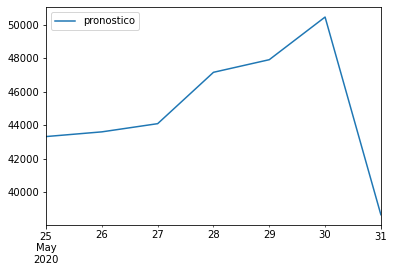

In [59]:
e_date = datetime.datetime.strptime('2020-05-31', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-05-25', '%Y-%m-%d')
delta = e_date - i_date

index_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    index_days.append(day)

prediccion = pd.DataFrame(inverted, index= index_days)
prediccion.columns = ['pronostico']
prediccion.plot()

In [60]:
datosReales = df_ine['2020-5-25':'2020-5-31']

compara = pd.concat([datosReales, prediccion], axis=1)
compara.columns = ['real', 'prediccion']
compara

,real,prediccion
2020-05-25,42126,43316
2020-05-26,45321,43598
2020-05-27,46185,44089
2020-05-28,47441,47167
2020-05-29,48454,47923
2020-05-30,40358,50479
2020-05-31,29599,38632


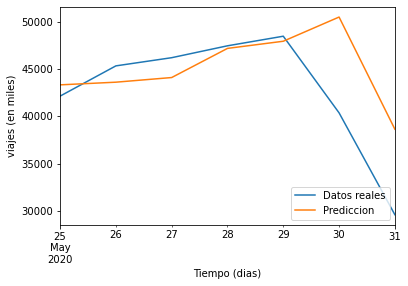

In [61]:
compara['real'].plot()
compara['prediccion'].plot()
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.legend( ('Datos reales', 'Prediccion'), loc = 'lower right')

In [62]:
# calculamos las metricas de error
testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion, datosReales)
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del test: 3566.86 MAE
Resultado del test: 27594973.14 MSE
Resultado del test: 5253.09 RMSE
Resultado del test: 11.67 CVRMSE
Resultado del test: 8.08 MAPE


In [63]:
# calculamos las metricas de error para cada dia por separado
for i in range(7):
    testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion.values[i], datosReales.values[i])
    day = i + 1
    print('Resultado del test dia %d: %.2f MAE' % (day, testScore_MAE))
    print('Resultado del test dia %d: %.2f MSE' % (day, testScore_MSE))
    print('Resultado del test dia %d: %.2f RMSE' % (day, testScore_RMSE))
    print('Resultado del test dia %d: %.2f CVRMSE' % (day, testScore_CVRMSE))
    print('Resultado del test dia %d: %.2f MAPE \n' % (day, testScore_MAPE))

Resultado del test dia 1: 1190.00 MAE
Resultado del test dia 1: 1416100.00 MSE
Resultado del test dia 1: 1190.00 RMSE
Resultado del test dia 1: 2.75 CVRMSE
Resultado del test dia 1: 2.75 MAPE 

Resultado del test dia 2: 1723.00 MAE
Resultado del test dia 2: 2968729.00 MSE
Resultado del test dia 2: 1723.00 RMSE
Resultado del test dia 2: 3.95 CVRMSE
Resultado del test dia 2: 3.95 MAPE 

Resultado del test dia 3: 2096.00 MAE
Resultado del test dia 3: 4393216.00 MSE
Resultado del test dia 3: 2096.00 RMSE
Resultado del test dia 3: 4.75 CVRMSE
Resultado del test dia 3: 4.75 MAPE 

Resultado del test dia 4: 274.00 MAE
Resultado del test dia 4: 75076.00 MSE
Resultado del test dia 4: 274.00 RMSE
Resultado del test dia 4: 0.58 CVRMSE
Resultado del test dia 4: 0.58 MAPE 

Resultado del test dia 5: 531.00 MAE
Resultado del test dia 5: 281961.00 MSE
Resultado del test dia 5: 531.00 RMSE
Resultado del test dia 5: 1.11 CVRMSE
Resultado del test dia 5: 1.11 MAPE 

Resultado del test dia 6: 10121.00 MA